### *Capstone- Data Import Exercise*

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns # Visualisation

%matplotlib inline
sns.set(color_codes=True)
# create tables
from tabulate import tabulate

# libraries for calculations & analysis
import statistics
import pylab
from scipy import stats

### *Exploring the CSV files*

In [2]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\Production-Data.csv'
uploaded_df = pd.read_csv(file_path)

In [3]:
uploaded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9487 entries, 0 to 9486
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SKU                    9487 non-null   int64  
 1   SKU_DESCRIPTION        9487 non-null   object 
 2   BATCHID                9487 non-null   int64  
 3   Recipe                 9487 non-null   object 
 4   Tank                   9487 non-null   object 
 5   Unit                   9487 non-null   object 
 6   Instruction_Step       9462 non-null   object 
 7   Source                 9487 non-null   object 
 8   Material_ID            2443 non-null   object 
 9   Material_Name          1980 non-null   object 
 10  Quantity               9487 non-null   float64
 11  Phase_start            9487 non-null   object 
 12  Phase_end              9487 non-null   object 
 13  Phase_duration         9487 non-null   int64  
 14  Phase_start_delay      9487 non-null   int64  
 15  Phas

In [4]:
uploaded_df

,SKU,SKU_DESCRIPTION,BATCHID,Recipe,Tank,Unit,Instruction_Step,Source,Material_ID,Material_Name,...,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Batch_Phase_Type,Deaeration Phase
0,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,S3_BATCH_IN_PROGRESS,TANK_STATUS,NaN,NaN,...,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,Batch start up,0
1,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,STEP1_CONS,CONS,1002565,WATER TREATED,...,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,Treated water bulk addition,0
2,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,PLEASE VERIFY BULK ADDITION,PROMPT,NaN,NaN,...,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,Prompt,0
3,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,STEP1_CONS,CONS,1037802,S813 SOD BENZOATE XFX25,...,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,Manadd addition,0
4,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,STEP1_CONS,CONS,1002818,S651 CITRIC ACID ANH BG XFX25,...,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,Manadd addition,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,3055706,BCH LE/A/B-809.00 P2,107737576,10168893:P_BBS24_50212314_00\EM_QA_25MT_UP:1\E...,U_25,U_25MT02,TAKE A SAMPLE AND SUBMIT FOR QA.,PROMPT,NaN,NaN,...,08/05/2022 11:54,11,0,19,0.0000,NaN,10,1.0,Lab sample taken,0
9483,3055706,BCH LE/A/B-809.00 P2,107737576,10168893:P_BBS24_50212314_00\EM_QA_25MT_UP:1\E...,U_25,U_25MT02,SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE),PROMPT,NaN,NaN,...,08/05/2022 11:55,1,0,20,0.0000,NaN,10,0.0,Lab sample taken,0
9484,3055706,BCH LE/A/B-809.00 P2,107737576,10168893:P_BBS24_50212314_00\EM_QA_25MT_UP:1\E...,U_25,U_25MT02,STEP8_AGITATION,AGITATION,NaN,NaN,...,08/05/2022 11:56,0,1,21,0.0000,NaN,0,0.0,Batch agitation,0
9485,3055706,BCH LE/A/B-809.00 P2,107737576,10168893:P_BBS24_50212314_00\EM_QA_25MT_UP:1\F...,U_25,U_25MT02,S4_BATCH_COMPLETE_QA_PENDING,TANK_STATUS,NaN,NaN,...,08/05/2022 11:56,0,0,22,0.0000,NaN,0,NaN,Tank status,0


## Data Preprocessing - Removal of unwanted columns and renaming columns

In [5]:
# rename the existing DataFrame (rather than creating a copy)
uploaded_df.rename(columns={'SKU': 'Material','Unit':'Tank_1','Material_ID':'INGRED_ID','Material_Name':'INGRED_Name'}, inplace=True)

In [6]:
uploaded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9487 entries, 0 to 9486
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Material               9487 non-null   int64  
 1   SKU_DESCRIPTION        9487 non-null   object 
 2   BATCHID                9487 non-null   int64  
 3   Recipe                 9487 non-null   object 
 4   Tank                   9487 non-null   object 
 5   Tank_1                 9487 non-null   object 
 6   Instruction_Step       9462 non-null   object 
 7   Source                 9487 non-null   object 
 8   INGRED_ID              2443 non-null   object 
 9   INGRED_Name            1980 non-null   object 
 10  Quantity               9487 non-null   float64
 11  Phase_start            9487 non-null   object 
 12  Phase_end              9487 non-null   object 
 13  Phase_duration         9487 non-null   int64  
 14  Phase_start_delay      9487 non-null   int64  
 15  Phas

In [7]:
# show the shape of the data frame

rows, columns = uploaded_df.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 9487
Number of columns: 22


In [8]:
# show the shape of the data frame
uploaded_df.count()

Material                 9487
SKU_DESCRIPTION          9487
BATCHID                  9487
Recipe                   9487
Tank                     9487
Tank_1                   9487
Instruction_Step         9462
Source                   9487
INGRED_ID                2443
INGRED_Name              1980
Quantity                 9487
Phase_start              9487
Phase_end                9487
Phase_duration           9487
Phase_start_delay        9487
Phase_row_no             9487
Flowrate_KGMIN           9487
Target_Flowrate          3108
Target_Phase_duration    9487
Phase_overrun            7363
Batch_Phase_Type         9487
Deaeration Phase         9487
dtype: int64

In [9]:
# Removal of unwanted columns from dataset
uploaded_df1=uploaded_df.drop(['SKU_DESCRIPTION', 'Recipe','Source','Tank', 'Batch_Phase_Type'], axis=1)

In [10]:
# Define a dictionary of replacements
replacements = {
    'U_25MT02': '2502',
    'U_25MT03': '2503',
    'U_25MT04': '2504',
    'U_26MT01' : '2601',
    'U_23MT02' : '2302',
    'U_23MT04' : '2304',
    'U_25MT01' : '2501',
    'U_23MT05' : '2305',
    'U_25MT02' : '2502',
    'U_22MT04' : '2204',
    'U_22MT03' : '2203',
    'U_22MT02' : '2202',
    'U_26MT04' : '2604',
    'U_26MT03' : '2603',
    'U_23MT03' : '2303',
    'U_22MT05' : '2205'
}

# Replace values in the 'TankName' column
uploaded_df1['Tank_1'].replace(replacements, inplace=True)

# Print the modified DataFrame
print(uploaded_df1)

      Material    BATCHID Tank_1  \
0      1002150  107643491   2503   
1      1002150  107643491   2503   
2      1002150  107643491   2503   
3      1002150  107643491   2503   
4      1002150  107643491   2503   
...        ...        ...    ...   
9482   3055706  107737576   2502   
9483   3055706  107737576   2502   
9484   3055706  107737576   2502   
9485   3055706  107737576   2502   
9486   3055706  107737576   2502   

                                   Instruction_Step INGRED_ID  \
0                              S3_BATCH_IN_PROGRESS       NaN   
1                                        STEP1_CONS   1002565   
2                       PLEASE VERIFY BULK ADDITION       NaN   
3                                        STEP1_CONS   1037802   
4                                        STEP1_CONS   1002818   
...                                             ...       ...   
9482               TAKE A SAMPLE AND SUBMIT FOR QA.       NaN   
9483  SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGEN

In [11]:
# drop duplicate rows from the DataFrame

uploaded_df1.drop_duplicates(inplace=True)

In [12]:
uploaded_df1.count()

Material                 9487
BATCHID                  9487
Tank_1                   9487
Instruction_Step         9462
INGRED_ID                2443
INGRED_Name              1980
Quantity                 9487
Phase_start              9487
Phase_end                9487
Phase_duration           9487
Phase_start_delay        9487
Phase_row_no             9487
Flowrate_KGMIN           9487
Target_Flowrate          3108
Target_Phase_duration    9487
Phase_overrun            7363
Deaeration Phase         9487
dtype: int64

In [13]:
# check for null values

print(uploaded_df1.isnull().sum())

Material                    0
BATCHID                     0
Tank_1                      0
Instruction_Step           25
INGRED_ID                7044
INGRED_Name              7507
Quantity                    0
Phase_start                 0
Phase_end                   0
Phase_duration              0
Phase_start_delay           0
Phase_row_no                0
Flowrate_KGMIN              0
Target_Flowrate          6379
Target_Phase_duration       0
Phase_overrun            2124
Deaeration Phase            0
dtype: int64


In [14]:
# Assuming you have a DataFrame named 'df'
# Check for null values using .isnull() method
null_values_df = uploaded_df1.isnull()

# Alternatively, you can use .isna() method
null_values_df = uploaded_df1.isna()

# Display the resulting DataFrame
print(null_values_df)

      Material  BATCHID  Tank_1  Instruction_Step  INGRED_ID  INGRED_Name  \
0        False    False   False             False       True         True   
1        False    False   False             False      False        False   
2        False    False   False             False       True         True   
3        False    False   False             False      False        False   
4        False    False   False             False      False        False   
...        ...      ...     ...               ...        ...          ...   
9482     False    False   False             False       True         True   
9483     False    False   False             False       True         True   
9484     False    False   False             False       True         True   
9485     False    False   False             False       True         True   
9486     False    False   False             False       True         True   

      Quantity  Phase_start  Phase_end  Phase_duration  Phase_start_delay  

In [15]:
#import pandas as pd

# Assuming you have a DataFrame named 'df'
# Replace null values with 0
#df_filled = uploaded_df1.fillna(0)
#uploaded_df2=uploaded_df1.fillna(0)
# Display the DataFrame with null values replaced
#print(uploaded_df2)

In [16]:
print(uploaded_df1.isnull().sum())

Material                    0
BATCHID                     0
Tank_1                      0
Instruction_Step           25
INGRED_ID                7044
INGRED_Name              7507
Quantity                    0
Phase_start                 0
Phase_end                   0
Phase_duration              0
Phase_start_delay           0
Phase_row_no                0
Flowrate_KGMIN              0
Target_Flowrate          6379
Target_Phase_duration       0
Phase_overrun            2124
Deaeration Phase            0
dtype: int64


In [17]:
uploaded_df1.head()

,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0


### Create A new csv file with tank names updated- to used in each tank python notebook  

In [18]:
# Create A new csv file with tank names updated- to used in each tank python notebook  
uploaded_df1.to_csv('C:/Users/User/Desktop/Thesis 2023/Capstone---CCT/Python Working Notebooks/ProductionDataupdated1.csv')

### Box plot to visualize the distribution of Phase_overrun across different Materials

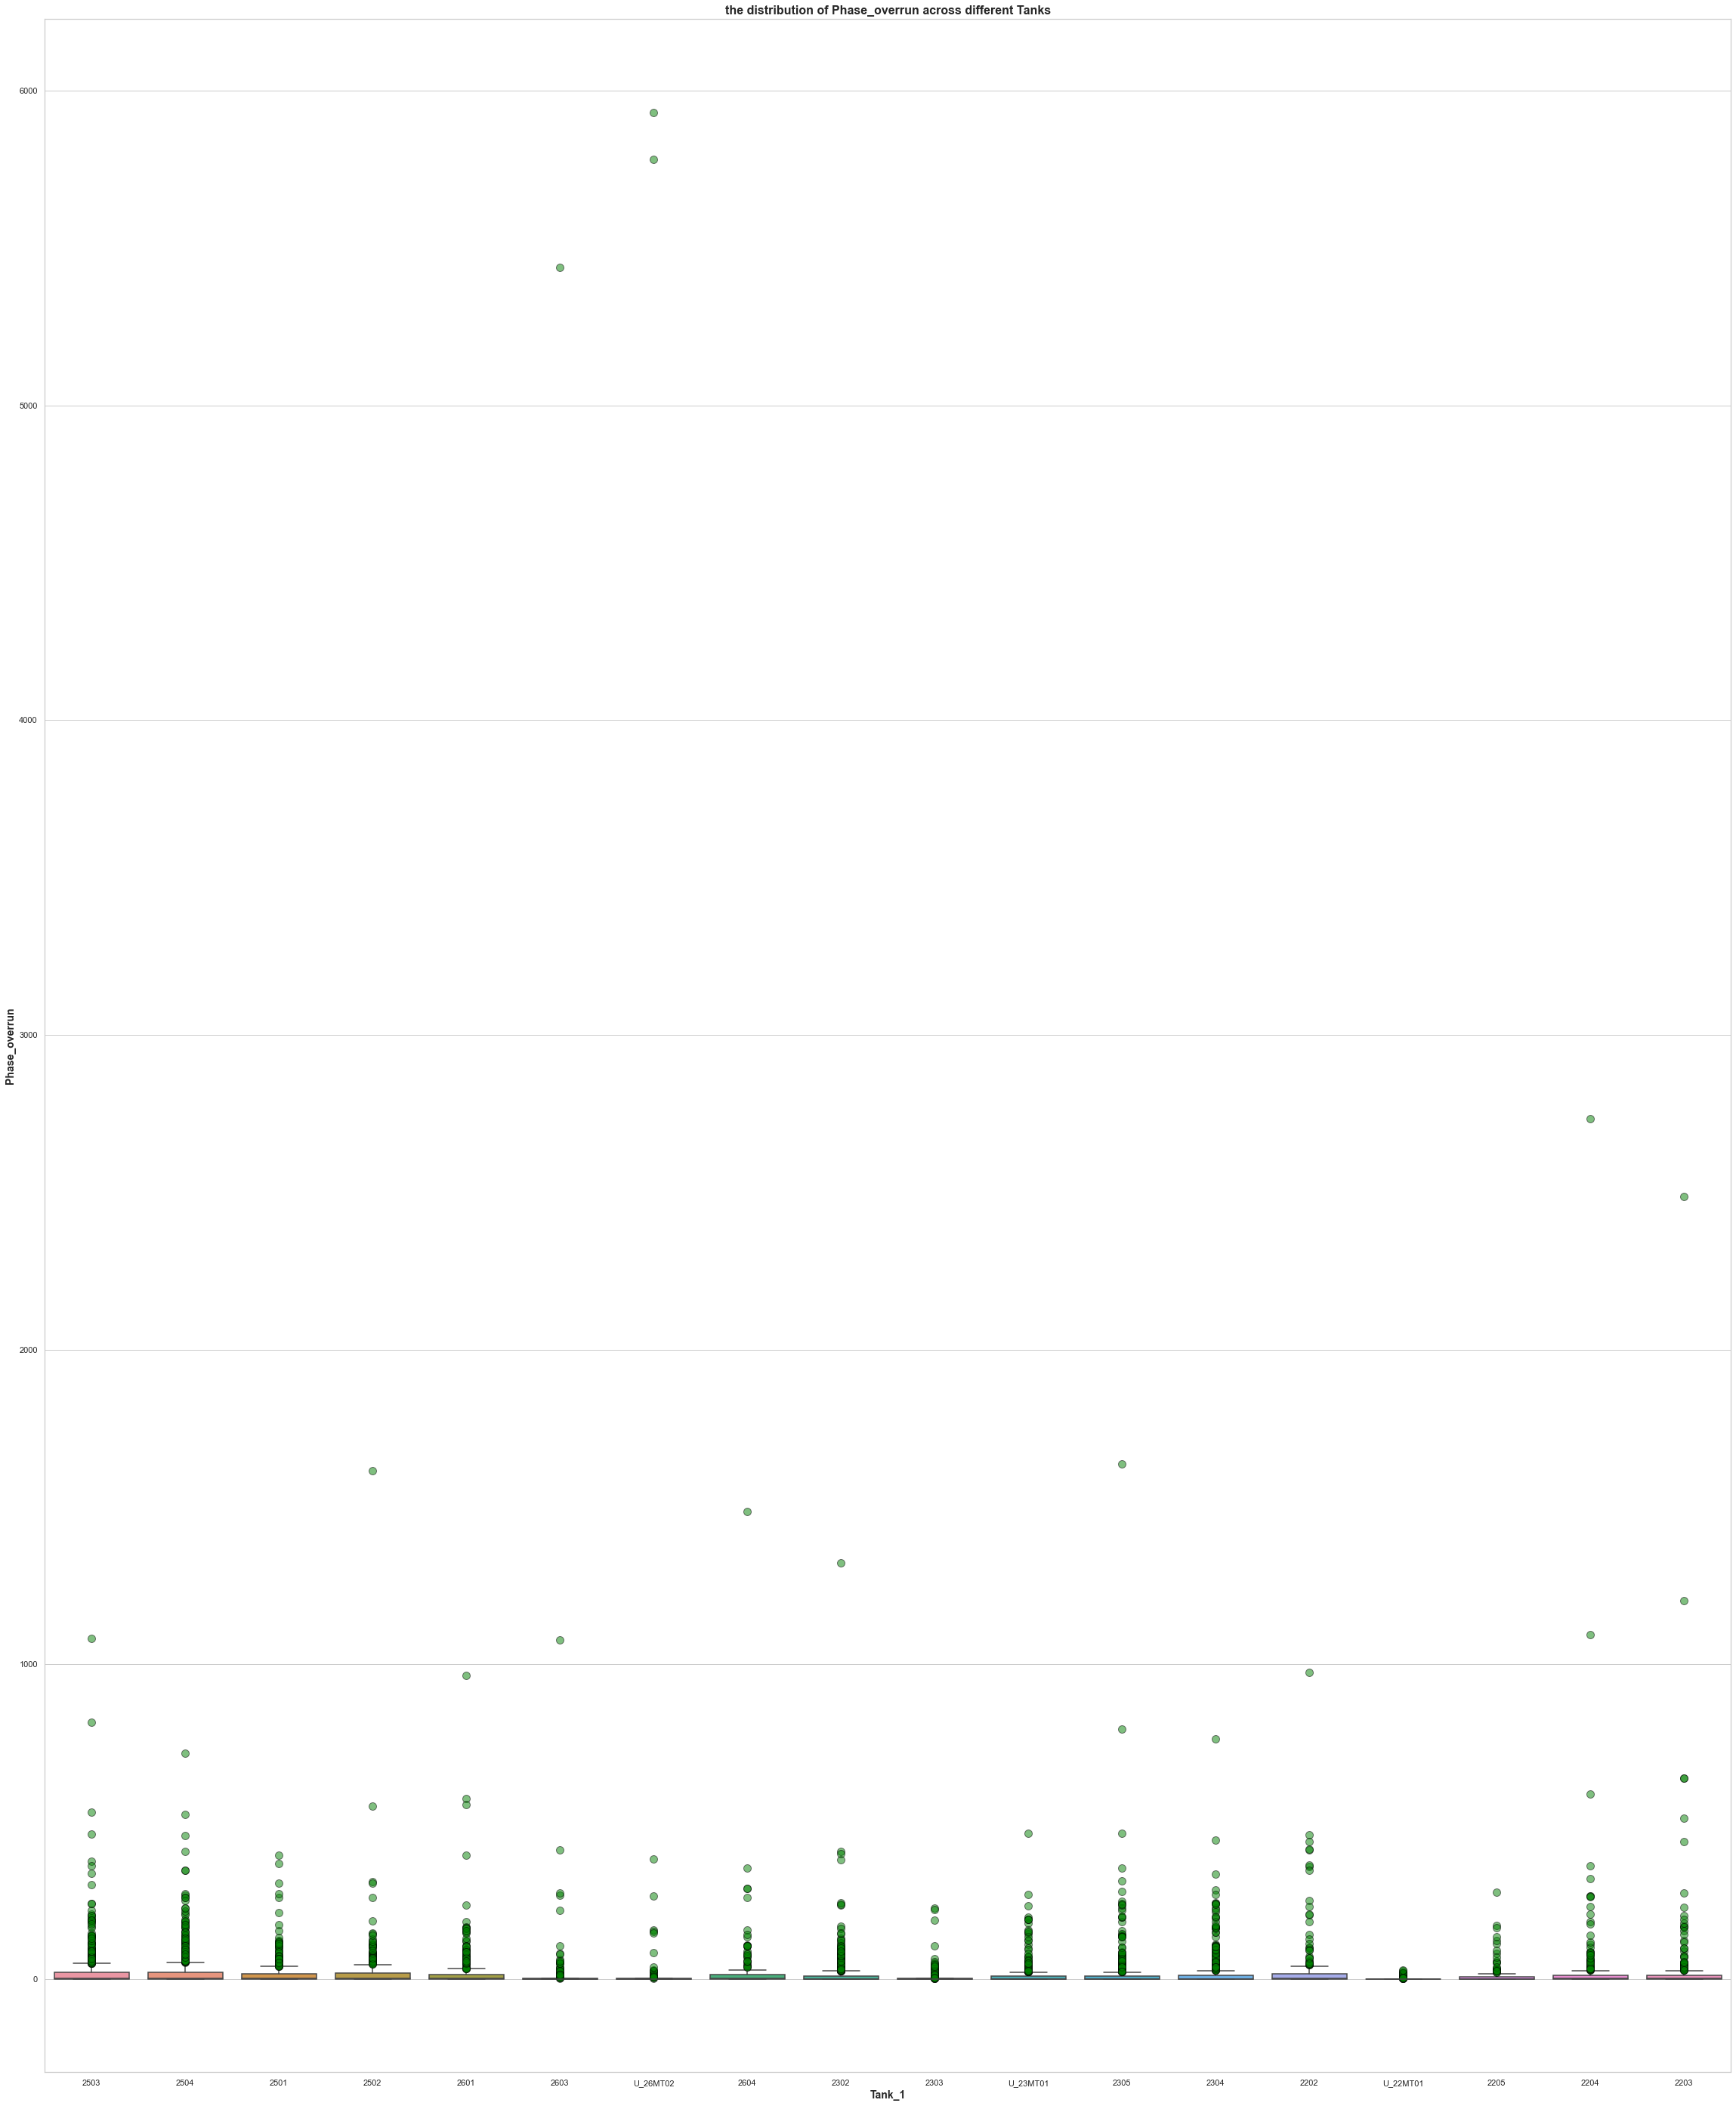

In [19]:
plt.figure(figsize=(40,50))
sns.set_style('whitegrid')
flierprops = dict(marker='o', markersize=10, markeredgecolor='black', markerfacecolor='green', alpha=0.5)
p = sns.boxplot(data=uploaded_df1, x='Tank_1', y='Phase_overrun', flierprops=flierprops)
p.set_xlabel('Tank_1', fontsize= 14, fontweight='bold')
p.set_ylabel('Phase_overrun', fontsize= 14, fontweight='bold')
p.set_title('the distribution of Phase_overrun across different Tanks', fontsize= 16, fontweight='bold');
plt.show()

### Exploring the common materials between all the production Tanks 

In [20]:
# To see what materials were producted in what tanks - are there a cross over

import pandas as pd

# Load your production tank DataFrame
df = pd.DataFrame(uploaded_df1)

# Group the data by 'Tank' and collect unique materials produced in each tank
tank_material_mapping = uploaded_df1.groupby('Tank_1')['Material'].unique()
tank_material_mapping


Tank_1
2202        [1397022, 1428047, 1451704, 1451710, 1520984, ...
2203        [1397022, 1428047, 1451704, 1451710, 1520984, ...
2204        [1397022, 1428047, 1520984, 1567195, 1648637, ...
2205        [1397022, 1428047, 1451704, 1451710, 1520984, ...
2302        [1397022, 1428047, 1451704, 1451710, 1520984, ...
2303        [1397022, 1428047, 1451704, 1451710, 1520984, ...
2304        [1397022, 1428047, 1451704, 1451710, 1520984, ...
2305        [1397022, 1428047, 1451710, 1520984, 1567195, ...
2501        [1006884, 1172415, 1172993, 1397022, 1486042, ...
2502        [1006884, 1172415, 1172993, 1397022, 1486042, ...
2503        [1002150, 1002373, 1172415, 1172898, 1172919, ...
2504        [1002150, 1002373, 1172415, 1172898, 1172919, ...
2601        [1036590, 1045448, 1368236, 1397022, 1527533, ...
2603        [1036590, 1045448, 1368236, 1397022, 1513667, ...
2604        [1036590, 1045448, 1368236, 1397022, 1513667, ...
U_22MT01    [1397022, 1428047, 1451704, 1520984, 1567195, ...
U

In [21]:
# Load your dataset DataFrame
df = pd.DataFrame(uploaded_df1)
# Group the data by 'Material_Name' and 'Tank' and count unique BatchIDs
batch_count_per_material_per_tank = df.groupby(['Material', 'Tank_1'])['BATCHID'].nunique()
print(batch_count_per_material_per_tank)

Material  Tank_1
1002150   2503       6
          2504       6
1002373   2503       3
          2504       3
1006884   2501       3
                    ..
3044756   2502       2
          2503      11
          2504      11
3055706   2501       1
          2502       1
Name: BATCHID, Length: 210, dtype: int64


In [22]:
# Convert the grouped data to a new DataFrame
new_df = batch_count_per_material_per_tank.reset_index()

# Rename the 'BATCHID' column to 'Batch_Count'
new_df.rename(columns={'BATCHID': 'Batch_Count'}, inplace=True)

# Print the new DataFrame
print(new_df)

     Material Tank_1  Batch_Count
0     1002150   2503            6
1     1002150   2504            6
2     1002373   2503            3
3     1002373   2504            3
4     1006884   2501            3
..        ...    ...          ...
205   3044756   2502            2
206   3044756   2503           11
207   3044756   2504           11
208   3055706   2501            1
209   3055706   2502            1

[210 rows x 3 columns]


## Graphing the CSV file: examining the various relationships between the variables

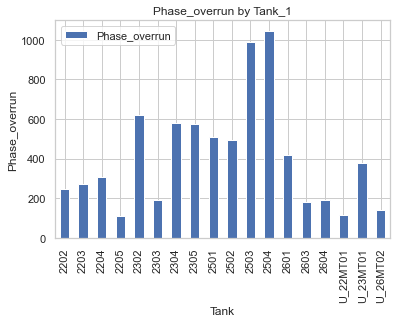

In [23]:
# uploaded_df

uploaded_df1[['Phase_overrun','Tank_1']].groupby(by='Tank_1').count().plot.bar()

plt.title('Phase_overrun by Tank_1')
plt.xlabel('Tank')
plt.ylabel('Phase_overrun')
plt.xticks(rotation = 90)
plt.show()

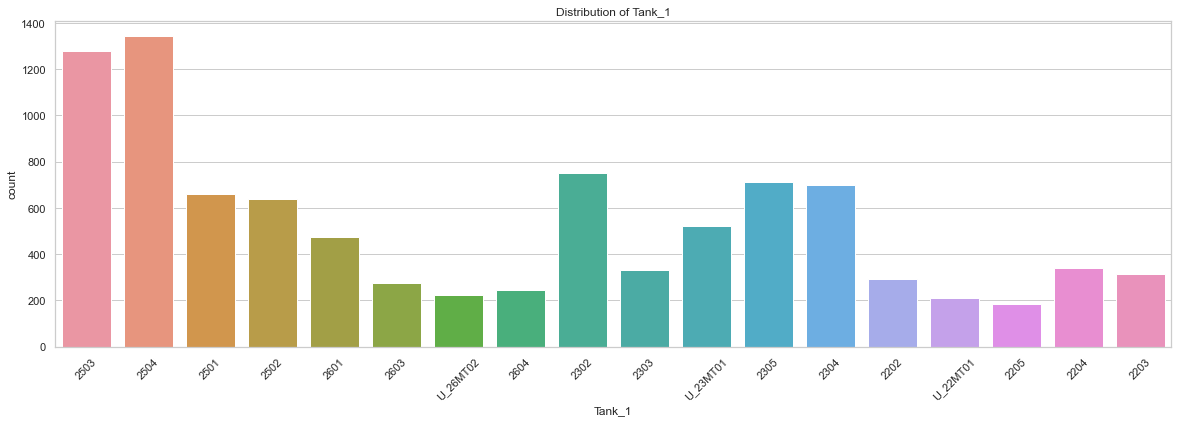

In [24]:
# Bar Chart (Categorical Variables)
plt.figure(figsize=(20, 6))
sns.countplot(data=uploaded_df1, x='Tank_1')
plt.xticks(rotation=45)
plt.title('Distribution of Tank_1')
plt.show()

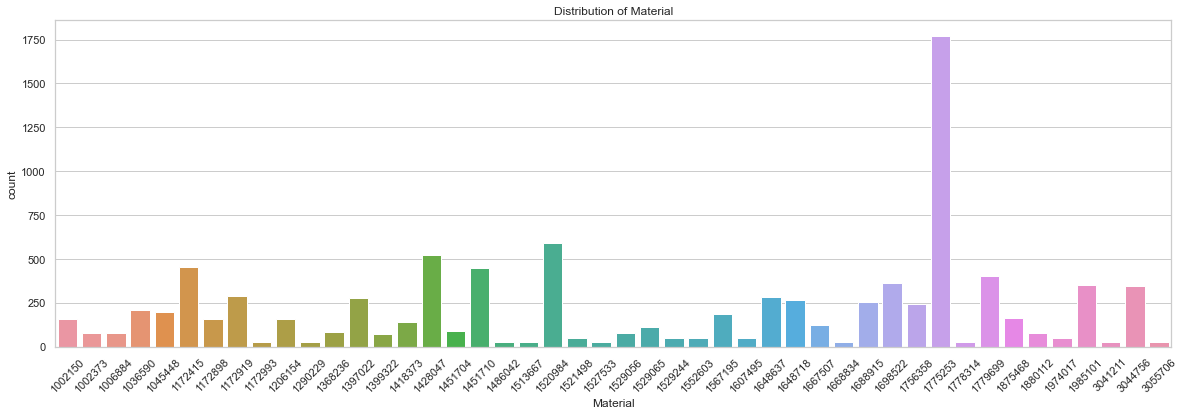

In [25]:
# Bar Chart (Categorical Variables)
plt.figure(figsize=(20, 6))
sns.countplot(data=uploaded_df1, x='Material')
plt.xticks(rotation=45)
plt.title('Distribution of Material')
plt.show()

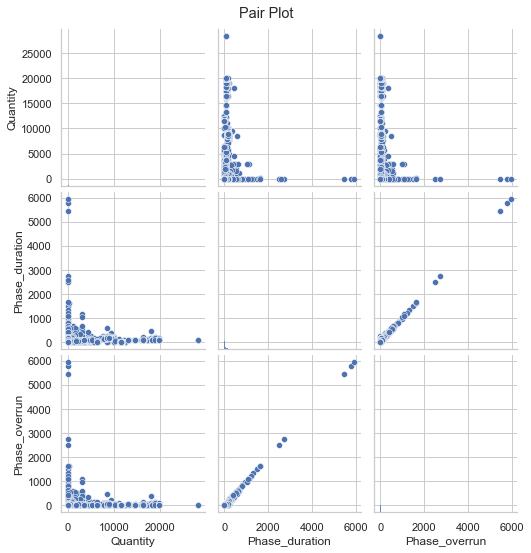

In [26]:
# Pair Plot (Scatter Matrix)
sns.pairplot(uploaded_df1[['Quantity', 'Phase_duration', 'Phase_overrun']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

In [27]:
## Check the distribution type of the dataframe

In [28]:
uploaded_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9487 entries, 0 to 9486
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Material               9487 non-null   int64  
 1   BATCHID                9487 non-null   int64  
 2   Tank_1                 9487 non-null   object 
 3   Instruction_Step       9462 non-null   object 
 4   INGRED_ID              2443 non-null   object 
 5   INGRED_Name            1980 non-null   object 
 6   Quantity               9487 non-null   float64
 7   Phase_start            9487 non-null   object 
 8   Phase_end              9487 non-null   object 
 9   Phase_duration         9487 non-null   int64  
 10  Phase_start_delay      9487 non-null   int64  
 11  Phase_row_no           9487 non-null   int64  
 12  Flowrate_KGMIN         9487 non-null   float64
 13  Target_Flowrate        3108 non-null   float64
 14  Target_Phase_duration  9487 non-null   int64  
 15  Phas

In [29]:
numeric_columns = ['Material','Deaeration Phase','Phase_row_no','Quantity','Phase_duration', 'Phase_overrun', 'Phase_start_delay','Flowrate_KGMIN']

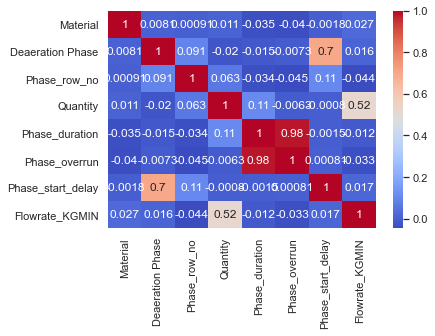

In [30]:
# Correlation heatmap to visualize correlation between numeric variables
correlation_matrix = uploaded_df1[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [31]:
uploaded_df1.describe()

,Material,BATCHID,Quantity,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
count,9.487000e+03,9.487000e+03,9487.000000,9487.000000,9487.000000,9487.000000,9487.000000,3108.000000,9487.000000,7363.000000,9487.000000
mean,1.607941e+06,1.078345e+08,1114.387758,38.275008,64.004005,8.521450,34.971681,137.720966,22.486561,22.624338,0.029830
std,3.956424e+05,1.534465e+05,3550.912601,132.431479,438.024750,6.312805,143.649431,228.811394,45.997016,140.615438,0.170128
min,1.002150e+06,1.075483e+08,0.000000,0.000000,0.000000,1.000000,0.000000,4.488600,0.000000,0.000000,0.000000
25%,1.418373e+06,1.077060e+08,0.000000,0.000000,0.000000,3.000000,0.000000,14.857700,2.000000,0.000000,0.000000
50%,1.648637e+06,1.078320e+08,0.000000,8.000000,0.000000,6.000000,0.000000,45.283300,10.000000,1.000000,0.000000
75%,1.775253e+06,1.079637e+08,75.002000,49.000000,1.000000,13.000000,4.567300,79.016000,17.000000,13.000000,0.000000
max,3.055706e+06,1.080913e+08,28408.764000,5941.000000,6582.000000,32.000000,6251.000000,965.083300,2584.000000,5931.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

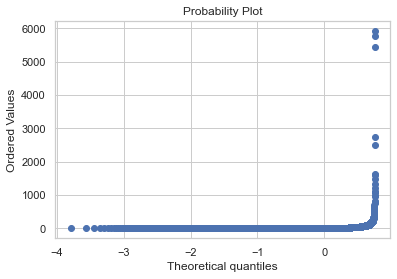

In [32]:
# check the normal distribution of the variables

stats.probplot(uploaded_df1['Phase_overrun'], dist='norm', plot=pylab);
pylab.show

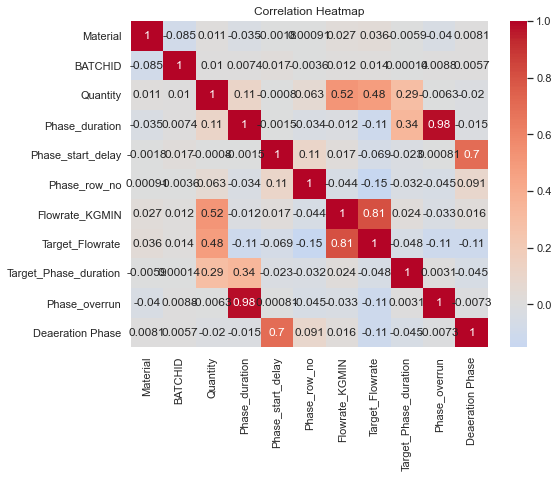

In [33]:
correlation_matrix = uploaded_df1.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [34]:
correlation = uploaded_df1['Phase_start_delay'].corr(uploaded_df1['Deaeration Phase'])

print(f"Correlation between Phase_start_delay and Deaeration Phase: {correlation:.2f}")

Correlation between Phase_start_delay and Deaeration Phase: 0.70
